In [48]:
# import libraries
import pandas as pd

In [49]:
data_df = pd.read_csv(r"data\swiggy.csv")

In [50]:
data_df.head(10)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
5,158204,Sam Uncle,Abohar,3.6,20+ ratings,₹ 200,Continental,22119652000052,https://www.swiggy.com/restaurants/sam-uncle-c...,"Sam Uncle, hanumangarh road near raja bajaj sh...",Menu/158204.json
6,156588,shere punjab veg,Abohar,4.0,100+ ratings,₹ 150,North Indian,22120652000021,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve...",Menu/156588.json
7,244866,Shri Balaji Vaishno Dhaba,Abohar,--,Too Few Ratings,₹ 100,North Indian,22119652000389,https://www.swiggy.com/restaurants/shri-balaji...,"Shri Balaji Vaishno Dhaba, St no 13,6th chowk,...",Menu/244866.json
8,156602,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,₹ 100,"Snacks,Chaat",22119652000042,https://www.swiggy.com/restaurants/hinglaj-kac...,"Hinglaj Kachori Bhandhar, street no 11 circula...",Menu/156602.json
9,158193,yummy hub,Abohar,--,Too Few Ratings,₹ 200,Indian,22119652000045,https://www.swiggy.com/restaurants/yummy-hub-c...,"yummy hub, hanumangarh road near dr naveen set...",Menu/158193.json


In [51]:
data_df["rating_count"].value_counts()

rating_count
Too Few Ratings    87014
20+ ratings        21636
100+ ratings       20548
50+ ratings        12009
500+ ratings        4396
1K+ ratings         2739
5K+ ratings           98
10K+ ratings          15
Name: count, dtype: int64

In [52]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [53]:
data_df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [54]:
cleaneddata_df = data_df.copy()

In [55]:
cleaneddata_df.loc[cleaneddata_df["rating"]=="--",'rating'] = 0

In [56]:
cleaneddata_df['rating'] = cleaneddata_df['rating'].astype(float)

In [57]:
cleaneddata_df.groupby("rating_count")["rating"].mean()

rating_count
100+ ratings       3.980383
10K+ ratings       3.813333
1K+ ratings        4.053012
20+ ratings        3.756517
50+ ratings        3.906120
500+ ratings       4.037125
5K+ ratings        4.086735
Too Few Ratings    0.000000
Name: rating, dtype: float64

In [58]:
cleaneddata_df = cleaneddata_df.dropna(subset=['cost'])

In [59]:
cleaneddata_df = cleaneddata_df.dropna(subset=['cuisine'])

In [60]:
cleaneddata_df = cleaneddata_df.drop(['menu','address','link','lic_no','id'],axis=1)

In [61]:
cleaneddata_df.isnull().sum()

name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [62]:
# Remove non-numeric characters (like ₹, $, €, and commas) and convert to integer
cleaneddata_df['cost'] = cleaneddata_df['cost'].str.replace(r'[^\d]', '', regex=True).astype(int)

In [63]:
cleaneddata_df.head(10)

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,0.0,Too Few Ratings,200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50+ ratings,200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100+ ratings,100,Beverages
3,Singh Hut,Abohar,3.7,20+ ratings,250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,0.0,Too Few Ratings,250,"Italian-American,Fast Food"
5,Sam Uncle,Abohar,3.6,20+ ratings,200,Continental
6,shere punjab veg,Abohar,4.0,100+ ratings,150,North Indian
7,Shri Balaji Vaishno Dhaba,Abohar,0.0,Too Few Ratings,100,North Indian
8,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,100,"Snacks,Chaat"
9,yummy hub,Abohar,0.0,Too Few Ratings,200,Indian


In [64]:
cleaneddata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148398 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          148398 non-null  object 
 1   city          148398 non-null  object 
 2   rating        148398 non-null  float64
 3   rating_count  148398 non-null  object 
 4   cost          148398 non-null  int64  
 5   cuisine       148398 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.9+ MB


In [65]:
cleaneddata_df["name"].value_counts()

name
Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    300
Baskin Robbins                                     274
                                                  ... 
MAITRI FOODS & BEVERAGES                             1
Cafe Bella Ciao                                      1
GRILL ZILLA                                          1
Singh Hut                                            1
FOOD WORLD RESTAURANT                                1
Name: count, Length: 112772, dtype: int64

In [66]:
def convert_rating(value):
    value = value.replace(' ratings', '').replace('+', '')  # Remove text
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)  # Convert K to actual number
    elif value == "Too Few Ratings":
        return 0  # Replace with 0 or another meaningful value
    return int(value)  # Convert remaining numbers

In [67]:
# Apply function to transform the column
cleaneddata_df['rating_count'] = cleaneddata_df['rating_count'].apply(convert_rating)

In [68]:
cleaneddata_df.head(10)

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,0.0,0,200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100,100,Beverages
3,Singh Hut,Abohar,3.7,20,250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,0.0,0,250,"Italian-American,Fast Food"
5,Sam Uncle,Abohar,3.6,20,200,Continental
6,shere punjab veg,Abohar,4.0,100,150,North Indian
7,Shri Balaji Vaishno Dhaba,Abohar,0.0,0,100,North Indian
8,Hinglaj Kachori Bhandhar,Abohar,4.2,20,100,"Snacks,Chaat"
9,yummy hub,Abohar,0.0,0,200,Indian


In [69]:
from sklearn.preprocessing import MultiLabelBinarizer

print(cleaneddata_df['cuisine'].shape[0])

# Convert cuisine column into a list of cuisines
cleaneddata_df['cuisine'] = cleaneddata_df['cuisine'].str.split(',')

print(cleaneddata_df['cuisine'].shape[0])

148398
148398


In [70]:
print(cleaneddata_df.shape[0])

148398


In [71]:
print(cleaneddata_df.columns)

Index(['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine'], dtype='object')


In [72]:
cleaneddata_df = cleaneddata_df.reset_index(drop=True)

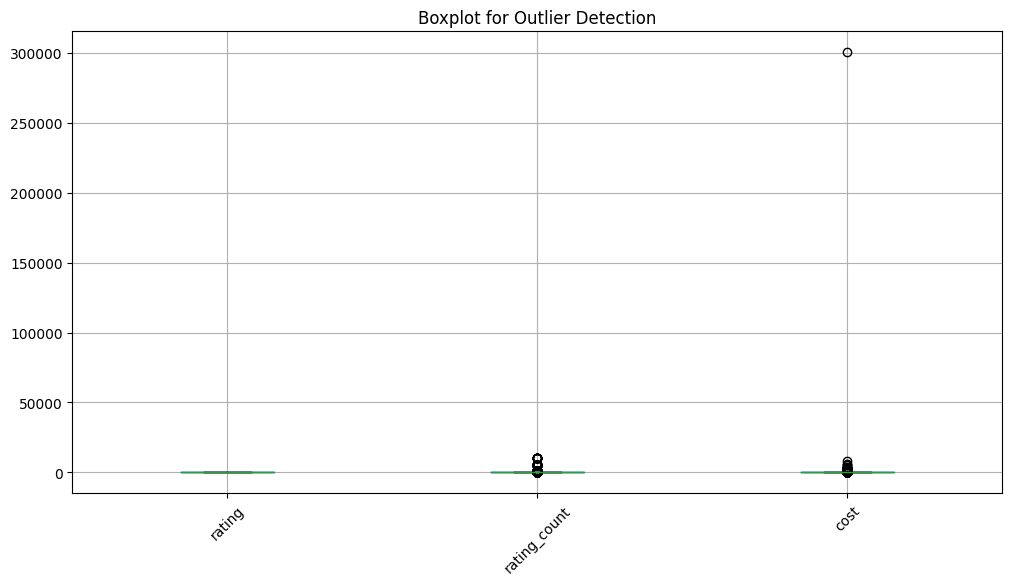

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
numerical_cols = cleaneddata_df.select_dtypes(include=['number']).columns.tolist()
cleaneddata_df[numerical_cols[:5]].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [74]:
cleaneddata_df.loc[cleaneddata_df["cost"]>25000,:]

,name,city,rating,rating_count,cost,cuisine
70718,KOHINOOR HOTEL,Hinganghat,0.0,0,300350,"[North Indian, Chinese]"


In [75]:
cleaneddata_df = cleaneddata_df[cleaneddata_df["cost"] <= 25000].reset_index(drop=True)

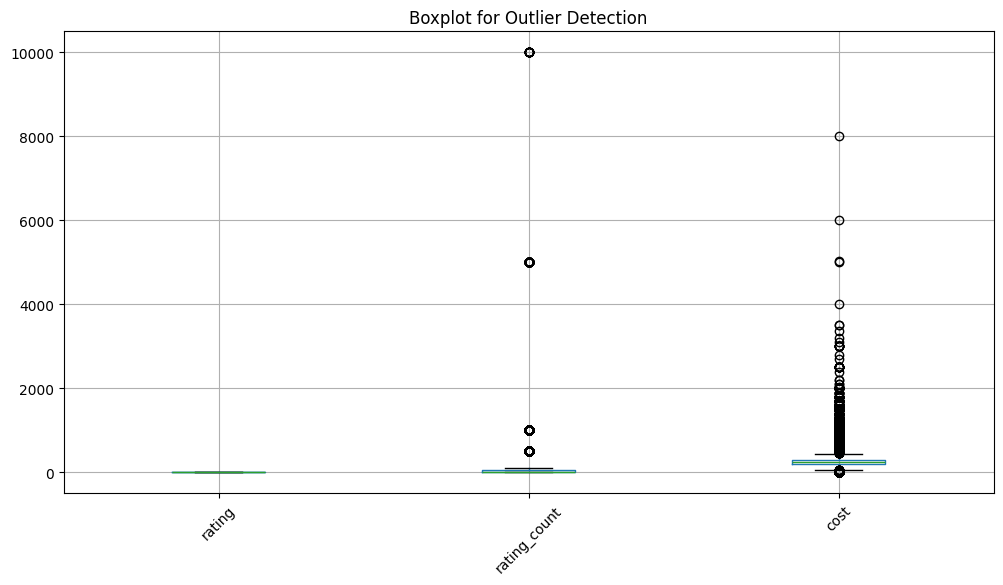

In [76]:
plt.figure(figsize=(12, 6))
numerical_cols = cleaneddata_df.select_dtypes(include=['number']).columns.tolist()
cleaneddata_df[numerical_cols[:3]].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

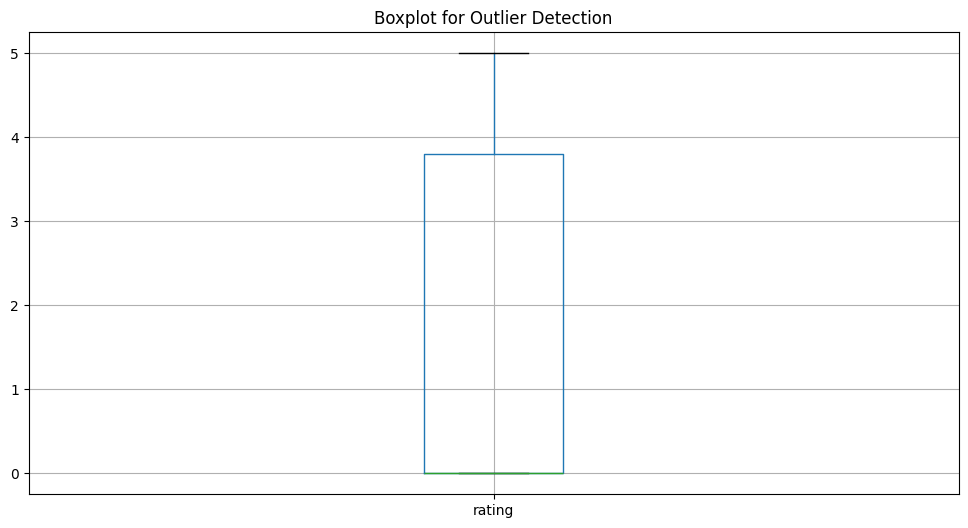

In [77]:
plt.figure(figsize=(12, 6))
cleaneddata_df[["rating"]].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

In [78]:
cleaneddata_df.to_csv(r"data\cleaned_data.csv")

In [79]:
# One-hot encoding the cuisine column
mlb = MultiLabelBinarizer()
cuisine_encoded = pd.DataFrame(mlb.fit_transform(cleaneddata_df['cuisine']), columns=mlb.classes_)

print(cuisine_encoded.shape)  # Transformed DataFrame

(148397, 127)


In [80]:
cuisine_encoded = cuisine_encoded.reset_index(drop=True)

encoded_df = cleaneddata_df.copy()

# Merge with original DataFrame
encoded_df = encoded_df.join(cuisine_encoded).drop(columns=['cuisine'])

print(encoded_df)

                            name      city  rating  rating_count  cost  \
0                 AB FOODS POINT    Abohar     0.0             0   200   
1              Janta Sweet House    Abohar     4.4            50   200   
2              theka coffee desi    Abohar     3.8           100   100   
3                      Singh Hut    Abohar     3.7            20   250   
4                  GRILL MASTERS    Abohar     0.0             0   250   
...                          ...       ...     ...           ...   ...   
148392          The Food Delight  Yavatmal     0.0             0   200   
148393  MAITRI FOODS & BEVERAGES  Yavatmal     0.0             0   300   
148394           Cafe Bella Ciao  Yavatmal     0.0             0   300   
148395               GRILL ZILLA  Yavatmal     0.0             0   250   
148396            Lazeez kitchen  Yavatmal     0.0             0   200   

        8:15 To 11:30 Pm  Afghani  African  American  Andhra  ...  Thai  \
0                      0        0   

In [81]:
encoded_df.isnull().sum()

name                            0
city                            0
rating                          0
rating_count                    0
cost                            0
                               ..
Use Code JUMBO30 to avail       0
Use code XPRESS121 to avail.    0
Vietnamese                      0
Waffle                          0
indian                          0
Length: 132, dtype: int64

In [82]:
encoded_df.columns.to_list()

['name',
 'city',
 'rating',
 'rating_count',
 'cost',
 '8:15 To 11:30 Pm',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Attractive Combos Available',
 'Australian',
 'Awadhi',
 'BEVERAGE',
 'Bakery',
 'Bakery products',
 'Bangladeshi',
 'Barbecue',
 'Bengali',
 'Beverages',
 'Bhutanese',
 'Bihari',
 'Biryani',
 'Biryani - Shivaji Military Hotel',
 'Bowl Company',
 'British',
 'Burgers',
 'Burmese',
 'Cafe',
 'Chaat',
 'Chettinad',
 'Chinese',
 'Coastal',
 'Code valid on bill over Rs.99',
 'Combo',
 'Continental',
 'Default',
 'Desserts',
 'Discount offer from Garden Cafe Express Kankurgachi',
 'European',
 'Fast Food',
 'Free Delivery ! Limited Stocks!',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Grocery products',
 'Gujarati',
 'Haleem',
 'Healthy Food',
 'Home Food',
 'Hyderabadi',
 'Ice Cream',
 'Ice Cream Cakes',
 'Indian',
 'Indonesian',
 'Italian',
 'Italian-American',
 'Jain',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebabs',
 'Ke

In [83]:
encoded_df = encoded_df.drop(['8:15 To 11:30 Pm', 'Attractive Combos Available','Code valid on bill over Rs.99','Discount offer from Garden Cafe Express Kankurgachi','Free Delivery ! Limited Stocks!','MAX 2 Combos per Order!','Popular Brand Store','Special Discount from (Hotel Swagath)','Use Code JUMBO30 to avail','Use code XPRESS121 to avail.'],axis=1)

In [84]:
print(encoded_df.info())  # Data types, non-null values
print(encoded_df.describe())  # Summary statistics
print(encoded_df.isnull().sum())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148397 entries, 0 to 148396
Columns: 122 entries, name to indian
dtypes: float64(1), int64(119), object(2)
memory usage: 138.1+ MB
None
              rating   rating_count           cost        Afghani  \
count  148397.000000  148397.000000  148397.000000  148397.000000   
mean        1.611941      58.383323     285.583213       0.000930   
std         1.940888     225.205113     167.609997       0.030481   
min         0.000000       0.000000       1.000000       0.000000   
25%         0.000000       0.000000     200.000000       0.000000   
50%         0.000000       0.000000     250.000000       0.000000   
75%         3.800000      50.000000     300.000000       0.000000   
max         5.000000   10000.000000    8000.000000       1.000000   

             African       American         Andhra        Arabian  \
count  148397.000000  148397.000000  148397.000000  148397.000000   
mean        0.000094       0.025674       0.004124    

In [85]:
len(encoded_df["name"].value_counts())

112771

In [86]:
len(encoded_df["city"].value_counts())

821

In [87]:
#cleaneddata_df = pd.get_dummies(cleaneddata_df, columns=['city'], drop_first=True)

In [88]:
encoded_df = encoded_df.drop(columns=['name','city'])  # Drop restaurant name, city

In [89]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=50)  # Reduce to 50 features
# pca.fit(features)  
# print(sum(pca.explained_variance_ratio_))  # Check % variance retained

In [90]:
print(encoded_df)

        rating  rating_count  cost  Afghani  African  American  Andhra  \
0          0.0             0   200        0        0         0       0   
1          4.4            50   200        0        0         0       0   
2          3.8           100   100        0        0         0       0   
3          3.7            20   250        0        0         0       0   
4          0.0             0   250        0        0         0       0   
...        ...           ...   ...      ...      ...       ...     ...   
148392     0.0             0   200        0        0         0       0   
148393     0.0             0   300        0        0         0       0   
148394     0.0             0   300        0        0         0       0   
148395     0.0             0   250        0        0         0       0   
148396     0.0             0   200        0        0         0       0   

        Arabian  Asian  Assamese  ...  Telangana  Tex-Mex  Thai  Thalis  \
0             0      0         0  ..

In [91]:
from sklearn.preprocessing import MinMaxScaler

# Normalize cost, rating, and rating count
scaler = MinMaxScaler()
encoded_df[["cost", "rating", "rating_count"]] = scaler.fit_transform(encoded_df[["cost", "rating", "rating_count"]])

print(encoded_df)

        rating  rating_count      cost  Afghani  African  American  Andhra  \
0         0.00         0.000  0.024878        0        0         0       0   
1         0.88         0.005  0.024878        0        0         0       0   
2         0.76         0.010  0.012377        0        0         0       0   
3         0.74         0.002  0.031129        0        0         0       0   
4         0.00         0.000  0.031129        0        0         0       0   
...        ...           ...       ...      ...      ...       ...     ...   
148392    0.00         0.000  0.024878        0        0         0       0   
148393    0.00         0.000  0.037380        0        0         0       0   
148394    0.00         0.000  0.037380        0        0         0       0   
148395    0.00         0.000  0.031129        0        0         0       0   
148396    0.00         0.000  0.024878        0        0         0       0   

        Arabian  Asian  Assamese  ...  Telangana  Tex-Mex  Thai

In [95]:
# from sklearn.neighbors import NearestNeighbors
# from scipy.sparse import csr_matrix

# # Convert to sparse format to save memory
# sparse_matrix = csr_matrix(encoded_df.values)

# # Use NearestNeighbors (more memory efficient than full cosine similarity)
# nn = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
# nn.fit(sparse_matrix)

# def get_similar_restaurants(index, top_n=5):
#     """
#     Get top N most similar restaurants using Nearest Neighbors.
#     """
#     # Ensure input is 2D
#     distances, indices = nn.kneighbors(sparse_matrix[index].reshape(1, -1))
    
#     # Get recommended restaurants (excluding itself)
#     top_indices = indices[0][1:top_n+1]
    
#     print("\n🎯 **Selected Restaurant:**")
#     print(cleaneddata_df.iloc[index])

#     print("\n⭐ **Recommended Restaurants to Try:**")
#     return cleaneddata_df.iloc[top_indices]

# # Example: Get 5 most similar restaurants for restaurant at index 10
# recommended_restaurants = get_similar_restaurants(10, top_n=5)
# print(recommended_restaurants)



🎯 **Selected Restaurant:**
name            CHAWLA SAAB THE JUICE MASTER
city                                  Abohar
rating                                   0.0
rating_count                               0
cost                                     300
cuisine                  [Juices, Beverages]
Name: 10, dtype: object

⭐ **Recommended Restaurants to Try:**
                                        name                   city  rating  \
17705        Sree Ganesha Fruit Juice Centre  Frazer Town,Bangalore     0.0   
82061   ANAND SHREE FRUIT JUICE & RESTAURANT     Vijay Nagar,Indore     0.0   
9489                                90's Kid  Koramangala,Bangalore     0.0   
143770                         CHEERS BRISTO                 Ujjain     0.0   
13729                        Prezzed Juicery  Indiranagar,Bangalore     0.0   

        rating_count  cost              cuisine  
17705              0   300  [Beverages, Juices]  
82061              0   300  [Juices, Beverages]  
9489          

In [96]:
encoded_df.to_csv(r"data\encoded_data.csv")